# EXPERIMENTS

## initialization
 * Do not forget to turn on the amplifier of the photodiode.

In [ ]:
import measurement_device as md
import simulation as sim
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.fft as fft
import pickle
from time import time

Device(name=simDev1)


## Experiment 1: cos signal
 sending a cos wave signal
### wave characteristics:
  * $$ f = 570 \left[Hz\right] $$
  * $$ A = \frac{1}{2} \left[v\right] $$
  * $$ \text{offset} = 3 \left[v\right] $$

### measurements characteristics:
  * $$ f = 1e4 \left[Hz\right] $$
  * $$ \text{duration} = 1 \left[s\right] $$

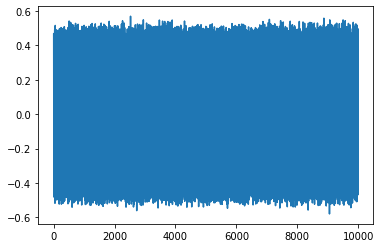

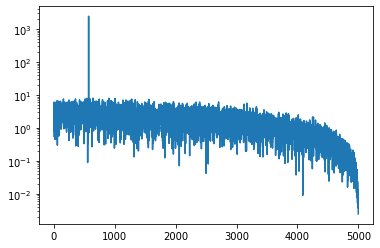

In [4]:
f = 570 # Hz
amp = 0.5 # v
offset = 3 # v
duration = 1 # Sec
rate = 10000 # Hz
filename = f"cos_wave.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = np.cos(f * 2 * np.pi * t) * amp
values = md.take_measurements(sig, rate, offset)
plt.plot(values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as f:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time()}, f)


## Experiment 2: square signal
 * write the details of the experiment

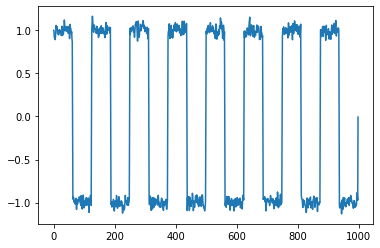

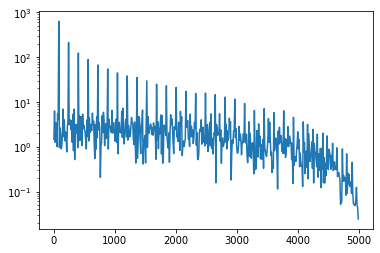

In [6]:
f = 80 # Hz
amp = 0.5 # v
offset = 3 # v
duration = 0.1 # Sec
rate = 10000 # Hz
filename = f"square_wave.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = sp.signal.square(f*t*2*np.pi)
values = md.take_measurements(sig, rate, offset)
plt.plot(values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as f:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time()}, f)

## Experiment 3: triangle signal.
 * write the details of the experiment

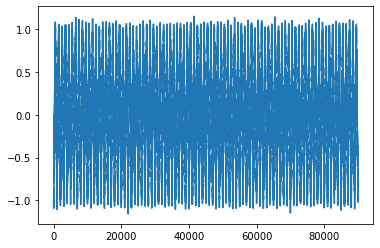

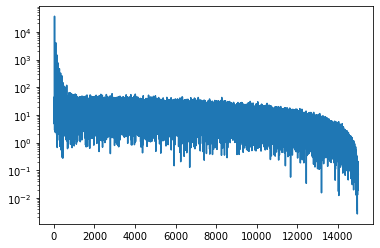

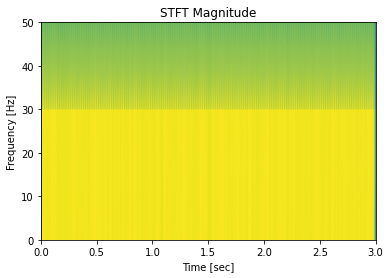

In [5]:
f = 30 # Hz
amp = 0.5 # v
offset = 3 # v
duration = 3 # Sec
rate = 30000 # Hz
filename = f"triangle_wave.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = sp.signal.sawtooth(t*f*2*np.pi, width=0.5)
values = md.take_measurements(sig, rate, offset)
plt.plot(values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as f:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time()}, f)

## Experiment 4: Amplitude Modulation
send data using amplitude modulation.
### Carrier wave:
  * $$ f = 5020 \left[Hz\right] $$
  * $$ A = 1 \left[v\right] $$
  * $$ \text{offset} = 3 \left[v\right] $$

### Message data:
  Cosine wave with the characteristics:
  * $$ f = 50 \left[Hz\right] $$
  * $$ A = \frac{1}{2} \left[v\right] $$

### measurment characteristics:
  * $$ f = 1e4 \left[Hz\right] $$
  * $$ \text{duration} = 2 \left[sec\right] $$

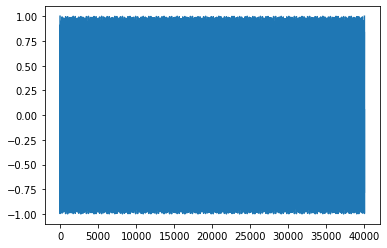

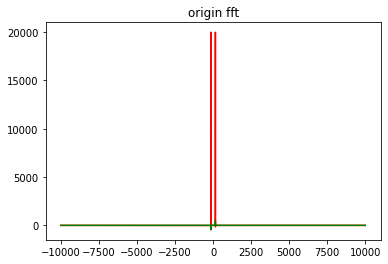

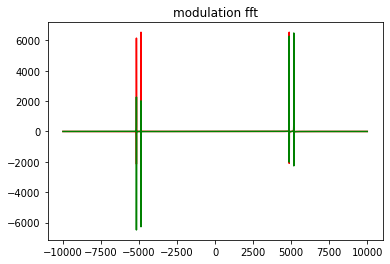

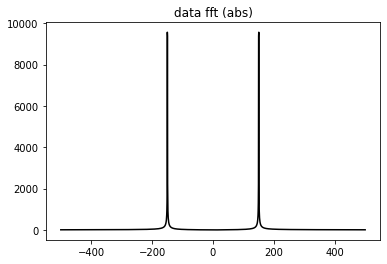

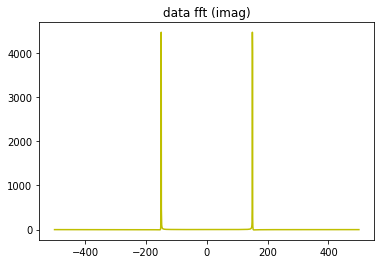

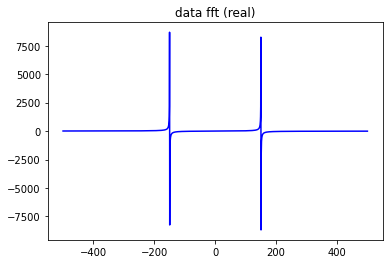

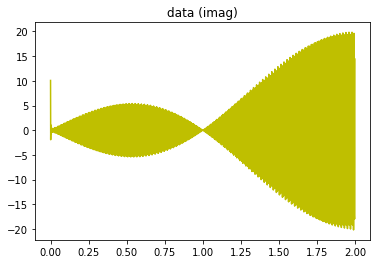

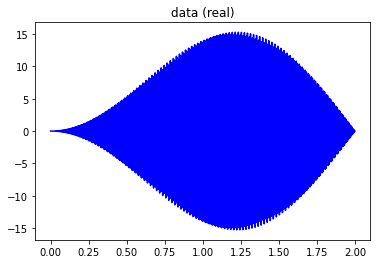

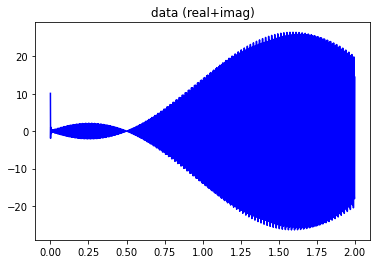

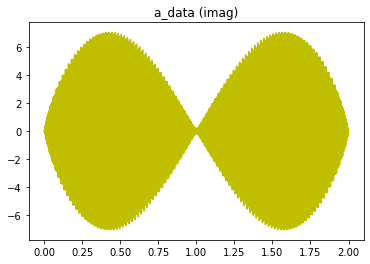

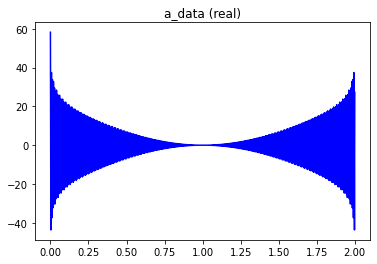

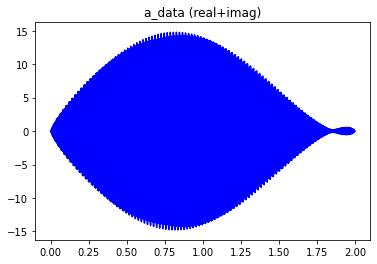

In [31]:
fr = 150 # Hz
fc = 5020# Hz
amp = 1 # v
mod_offset = 1 # v
offset = 2 # v
duration = 2 # Sec
rate = 20000 # Hz
filename = f"am_cos_fr{fr}fc{fc}.pickle"
t = np.linspace(0, duration, round(duration * rate))

msg = amp*np.cos(t*fr*2*np.pi)
am = lambda msg: msg*np.cos(t*fc*2*np.pi)
sig = am(msg+mod_offset)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "carrier freq":fc,
            "data amp": amp,
            "modulation offset":mod_offset,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(rx)
plt.show()
sim.show_fft(rx, duration)


# plt.plot(am_sig)
# plt.show()
# sig_fft = fft.fftshift(fft.fft(am_sig))
# frequencies = fft.fftfreq(msg.size, 1/rate)
# plt.plot(fft.fftshift(frequencies), np.real(fft.fftshift(fft.fft(msg))), "r")
# plt.plot(fft.fftshift(frequencies), np.imag(fft.fftshift(fft.fft(msg))), "g")
# plt.title("origin fft")
# plt.show()


In [23]:
plt.plot(freq)

-5020.0


In [34]:
fr = 50 # Hz
fc = 5020# Hz
amp = 1 # v
duration = 2 # Sec
rate = 20000 # Hz
offset = 3 # v
filename = f"pm_cos_fr{fr}fc{fc}.pickle"
t = np.linspace(0, duration, round(duration * rate))

msg = amp*np.cos(t*fr*2*np.pi)
pm = lambda msg: np.cos(t*fc*2*np.pi + msg)
sig = pm(msg)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "carrier freq":fc,
            "data amp": amp,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(rx)
plt.show()
sim.show_fft(rx, duration)

## nyquist frequency

In [ ]:
fr = 50000 # Hz
amp = 1 # v
duration = 2 # Sec
rate = 20000 # Hz
offset = 3 # v
filename = f"nyquist_fr{fr}rate{rate}.pickle"
t = np.linspace(0, duration, round(duration * rate))

sig = amp*np.cos(t*fr*2*np.pi)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "data amp": amp,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(rx)
plt.show()
sim.show_fft(rx, duration)